# Descriptive Stats

Descriptive Statistics = Describing the data we have collected.

Let's run through some descriptive stats.  Many of the notes are from the Udacity course I took.

When working with data, we must understand its data type since that determines what analysis can be performed and plots built.

## Quantitative

* Data takes on numeric values that allow us to perform mathematical operations.
* Examples: age, income, number of dogs

Two types of Quantitative data:

1. Continuous
    * Data can take on any numeric value.
    * Data can be split into smaller and smaller units, and still a smaller unit exists.
    * Example: age
1. Discrete
    * Data only takes on countable values.
    * Data cannot be split into smaller units.
    * Example: visitors to a site

## Categorical

* Used to label a group or set of items.
* Examples: zip code, marital status, gender, dog breed

Two types of Categorical data:

1. Categorical Ordinal
    * Data take on a ranked ordering.
    * Example: survey feedback from very positive to very negative
1. Categorical Nominal
    * Data do not have an order or ranking.
    * Example: dog breed


In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Quantitative Variables

In [2]:
# first, let's build a data set:
np.random.seed(16)

df = pd.DataFrame(
    {'donuts': np.random.randint(0, 1000, size=10000)}
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
donuts    10000 non-null int64
dtypes: int64(1)
memory usage: 78.2 KB


In [3]:
# generate descriptive stats about this donuts value.
df.describe()

donuts
count  10000.00000
mean     495.69390
std      288.47435
min        0.00000
25%      243.00000
50%      494.00000
75%      750.00000
max      999.00000

## Measures of Center

Let's look at mean, median, and mode.

* Mean
    * Is not always the best measure of center.  The mean may not be in the middle.  It may also calculate a decimal value for discrete data.
* Median
    * Splits our data so that 50% of our values are lower and 50% are higher.
    * For sets with odd numbers, the median is the number right in the middle.
    * For sets with even numbers, the median is the average of the two values in the middle.
    * Values must be sorted to calculate the median.
* Mode
    * This is the most common value in the data set.
    * There can be no mode at all.  This occurs when all observations have the same frequency.
    * There can be multiple modes. If two (or more) observations share the maximum value, then there is more than one mode. 


In [4]:
df.donuts.mean()

495.69389999999999

In [5]:
df.donuts.median()

494.0

In [6]:
df.mode()

donuts
0     353
1     381
2     771

In [7]:
df.donuts.value_counts(ascending=False).head()

771    21
381    21
353    21
876    20
437    20
Name: donuts, dtype: int64

## Measures of Spread

Measures of Spread are used to provide us an idea of how spread out our data are from one another. Common measures of spread include:

1. Range and Interquartile Range (IQR)
1. Standard Deviation and Variance

### Range and IQR

The Five Number Summary gives us the Range and IQR:

* minimum
* Q1: 25% Q
    * This is the median between minimum and Q2.
* Q2: 50% Q
* Q3: 75% Q
    * This is the median between Q2 and maximum.
* maximum

In [8]:
df.donuts.describe()

count    10000.00000
mean       495.69390
std        288.47435
min          0.00000
25%        243.00000
50%        494.00000
75%        750.00000
max        999.00000
Name: donuts, dtype: float64

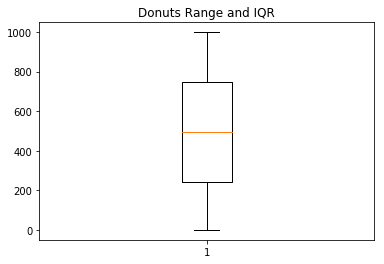

In [9]:
plt.boxplot(df.donuts)
plt.title("Donuts Range and IQR");

### Standard Deviation and Variance

The standard deviation is a single value that will tell us about the data set's spread.  The standard deviation is used all the time to get a single value.  It can be easily used to compare the spread of two data sets.

> The standard deviation is one of the most common measures for talking about the spread of data. It is defined as the average distance of each observation from the mean.

It's worth knowing the calcluation, but all software will quickly calcluate the standard deviation.

1. First, find the mean.
1. Then, calculate the difference between each observation and the mean.
1. Then, square those values to make everything positive.
1. Then, average those values.  This gets the average squared distance.  This is called the Variance.
1. Finally, take the square root of the variance.  This is the Standard Deviation.

Tips:

* Higher standard deviation = higher risk in the business / money world.
* For comparison to be fair, the units of each must be the same.
* The standard deviation has the same units as the data itself so it's preferred over the variance, which has squared units.

In [10]:
print("Standard Deviation:", df.donuts.std())

Standard Deviation: 288.474349896


In [11]:
print("Variance:", df.donuts.var())

Variance: 83217.4505478


In [12]:
import math

print("Standard Deviation:", math.sqrt(df.donuts.var()))

Standard Deviation: 288.4743498958699


## Shape of the Distribution

### Left Skewed = shorter bins on left, taller bins on right

* Mean < Median

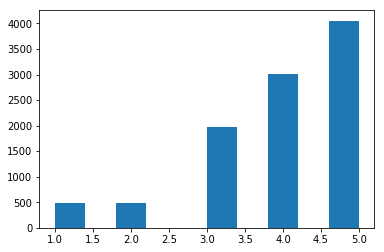

In [13]:
np.random.seed(16)
left_skewed =  np.random.choice([1,2,3,4,5], p=[.05,.05,.2,.3,.4], size=10000)
plt.hist(left_skewed);

### Symmetric = left and right sides mirror one another

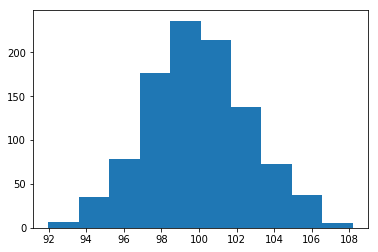

In [14]:
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
# loc = median, scale = standard deviation, size = number of points to create
np.random.seed(16)
plt.hist(np.random.normal(loc=100, scale=2.75, size=1000));

### Right Skewed = shorter bins on right, taller bins on left

* Mean > Median

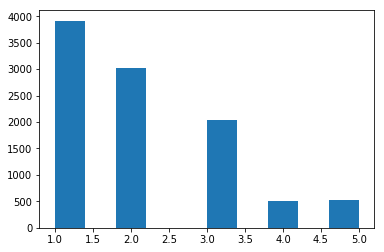

In [15]:
np.random.seed(16)
right_skewed =  np.random.choice([1,2,3,4,5], p=[.4,.3,.2,.05,.05], size=10000)
plt.hist(right_skewed);

## Outliers

## Outliers

> Outliers are points that fall very far from the rest of our data points.

We can find these visually with a quick plot of the data using both histograms and box plots.

Guidelines:

1. Plot the data.
1. If outliers exist, determine how to handle them.
    * May require a domain expert to decide whether to ignore, fix, or remove them.
1. For Normal Distributions:
    * Mean and Standard Deviation tell us a lot.  Also, state the data is normally distributed.
1. For Skewed Distirbutions:
    * Five Number Summary provides better information.

Outliers impact summary stats by:

* Mean goes way off.  Median is a better center of measure.
* Standard Deviation is no longer a good measure.  Just one outlier can cause this value to be very high.

How should we work with these outliers?

1. Note they exist and acknowledge how the impact our summary statistics.
1. If they are errors, we can remove or correct them.
1. Understand why they exist.
1. Reporting the Five Number Summary is better when outliers are present.
    * Avoid Mean and Standard Deviation.  A single number can be very misleading with what is happening in our data.

In [16]:
np.random.seed(16)
outliers_original = pd.DataFrame({'donuts':np.random.normal(loc=100, scale=2.25, size=1000)})

In [17]:
outliers_original.describe()

donuts
count  1000.000000
mean     99.952500
std       2.228113
min      93.450632
25%      98.442519
50%      99.893045
75%     101.412055
max     106.690211

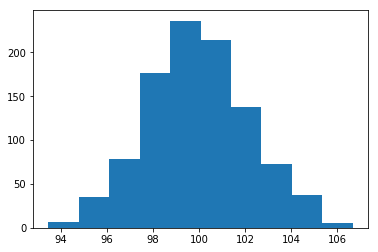

In [18]:
plt.hist(outliers_original.donuts);

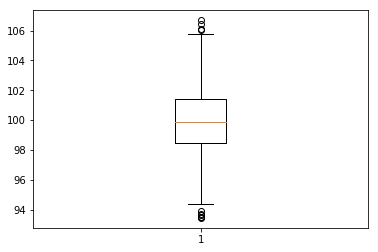

In [19]:
plt.boxplot(outliers_original.donuts);

In [20]:
# now, let's add some outliers and plot again
outliers_new = outliers_original.append(pd.DataFrame({'donuts':[70, 42, 160, 5050]}))

In [21]:
outliers_new.describe()

donuts
count  1004.000000
mean    104.855080
std     156.263894
min      42.000000
25%      98.440116
50%      99.893045
75%     101.416728
max    5050.000000

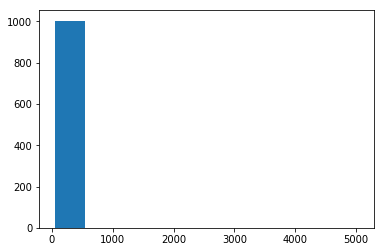

In [22]:
plt.hist(outliers_new.donuts);

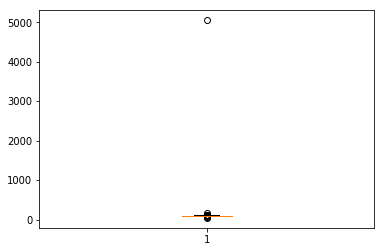

In [23]:
plt.boxplot(outliers_new.donuts);

In [24]:
original_vs_new = pd.DataFrame(
    {
        'original': outliers_original.describe()['donuts'],
        'new': outliers_new.describe()['donuts']
    }
)
original_vs_new['difference'] = original_vs_new.new - original_vs_new.original
original_vs_new

original          new   difference
count  1000.000000  1004.000000     4.000000
mean     99.952500   104.855080     4.902580
std       2.228113   156.263894   154.035780
min      93.450632    42.000000   -51.450632
25%      98.442519    98.440116    -0.002403
50%      99.893045    99.893045     0.000000
75%     101.412055   101.416728     0.004673
max     106.690211  5050.000000  4943.309789

# Analyzying Categorical Data

We typically just calculate percentages in the group.  The four aspects associated with describing quantitative variables are not applicable here (center, spread, shape, outliers).

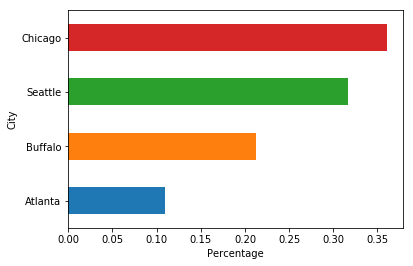

In [25]:
categorical_data = pd.DataFrame(
    {'city': np.random.choice(['Chicago', 'Buffalo', 'Seattle', 'Atlanta'], p=[.4, .2, .3, .1], size=1000)}
)

categorical_data.city.value_counts(normalize=True, ascending=True).plot(kind='barh')
plt.ylabel('City')
plt.xlabel('Percentage');